In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('model_creation_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,zip_code,Estimate Male Total population AGE Under 5 years,Estimate Male Total population AGE 5 to 9 years,Estimate Male Total population AGE 10 to 14 years,Estimate Male Total population AGE 15 to 19 years,Estimate Male Total population AGE 20 to 24 years,Estimate Male Total population AGE 25 to 29 years,Estimate Male Total population AGE 30 to 34 years,Estimate Male Total population AGE 35 to 39 years,Estimate Male Total population AGE 40 to 44 years,...,Estimate Households Mean income (dollars),Estimate Families Total,Estimate Families Median income (dollars),Estimate Families Mean income (dollars),Estimate Married-couple families Total,Estimate Married-couple families Median income (dollars),Estimate Nonfamily households Total,Estimate Nonfamily households Median income (dollars),Estimate Nonfamily households Mean income (dollars),EVs on the Road
0,10001,675.0,529.0,398.0,390.0,798.0,1642.0,2384.0,1425.0,897.0,...,205444.0,4715,182117.0,269616.0,3291,250000.0,10382,105801.0,175089.0,224
1,10002,1351.0,2027.0,1667.0,1545.0,2155.0,4034.0,3241.0,2999.0,2224.0,...,93314.0,16924,51093.0,98795.0,9848,71682.0,18847,41294.0,87485.0,356
2,10003,895.0,644.0,432.0,2831.0,2566.0,3449.0,3224.0,1946.0,1608.0,...,248577.0,6847,250000.0,416996.0,5896,250000.0,18233,117570.0,184364.0,318
3,10004,153.0,171.0,11.0,9.0,32.0,360.0,452.0,294.0,147.0,...,309645.0,799,250000.0,394971.0,761,250000.0,976,178034.0,238825.0,239
4,10005,56.0,41.0,266.0,0.0,372.0,1133.0,515.0,720.0,315.0,...,279387.0,1432,250000.0,391858.0,1321,250000.0,3724,191394.0,235868.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,14898,41.0,76.0,24.0,63.0,105.0,20.0,15.0,22.0,56.0,...,76715.0,397,59315.0,82616.0,310,84375.0,124,40769.0,47154.0,2
1671,14901,308.0,504.0,476.0,685.0,436.0,624.0,613.0,532.0,561.0,...,52528.0,2743,47849.0,60616.0,1466,70658.0,2807,29564.0,42986.0,42
1672,14903,229.0,163.0,127.0,242.0,102.0,229.0,194.0,191.0,157.0,...,99421.0,1751,80398.0,102963.0,1286,101630.0,1320,47727.0,90075.0,95
1673,14904,312.0,256.0,423.0,460.0,561.0,386.0,788.0,563.0,494.0,...,71472.0,3411,74594.0,85962.0,2103,91635.0,3008,34360.0,50598.0,43


In [ ]:
df['EVs on the Road'] = np.log1p(df['EVs on the Road'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = df.sample(frac=1.0,random_state=42) # Shuffle data
train, test = train_test_split(df, test_size=0.3, random_state=42)

y_train = train['EVs on the Road']
y_test = test['EVs on the Road']

X_train = train.iloc[:, 1:-1]
X_test = test.iloc[:, 1:-1]


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5,random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_features=10, random_state=42)

In [ ]:
# Train metrics
train_rsquare = dt_model.score(X_train, y_train)
train_pred = dt_model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_pred) ** 0.5

print("train r-square", train_rsquare)
print("train rmse", train_rmse)

# Test metrics
test_rsquare = dt_model.score(X_test, y_test)
test_pred = dt_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

print("test r-square", test_rsquare)
print("test rmse", test_rmse)

train r-square 1.0
train rmse 1.1234067965130459e-17
test r-square 0.8298360979853909
test rmse 0.7086321068461353


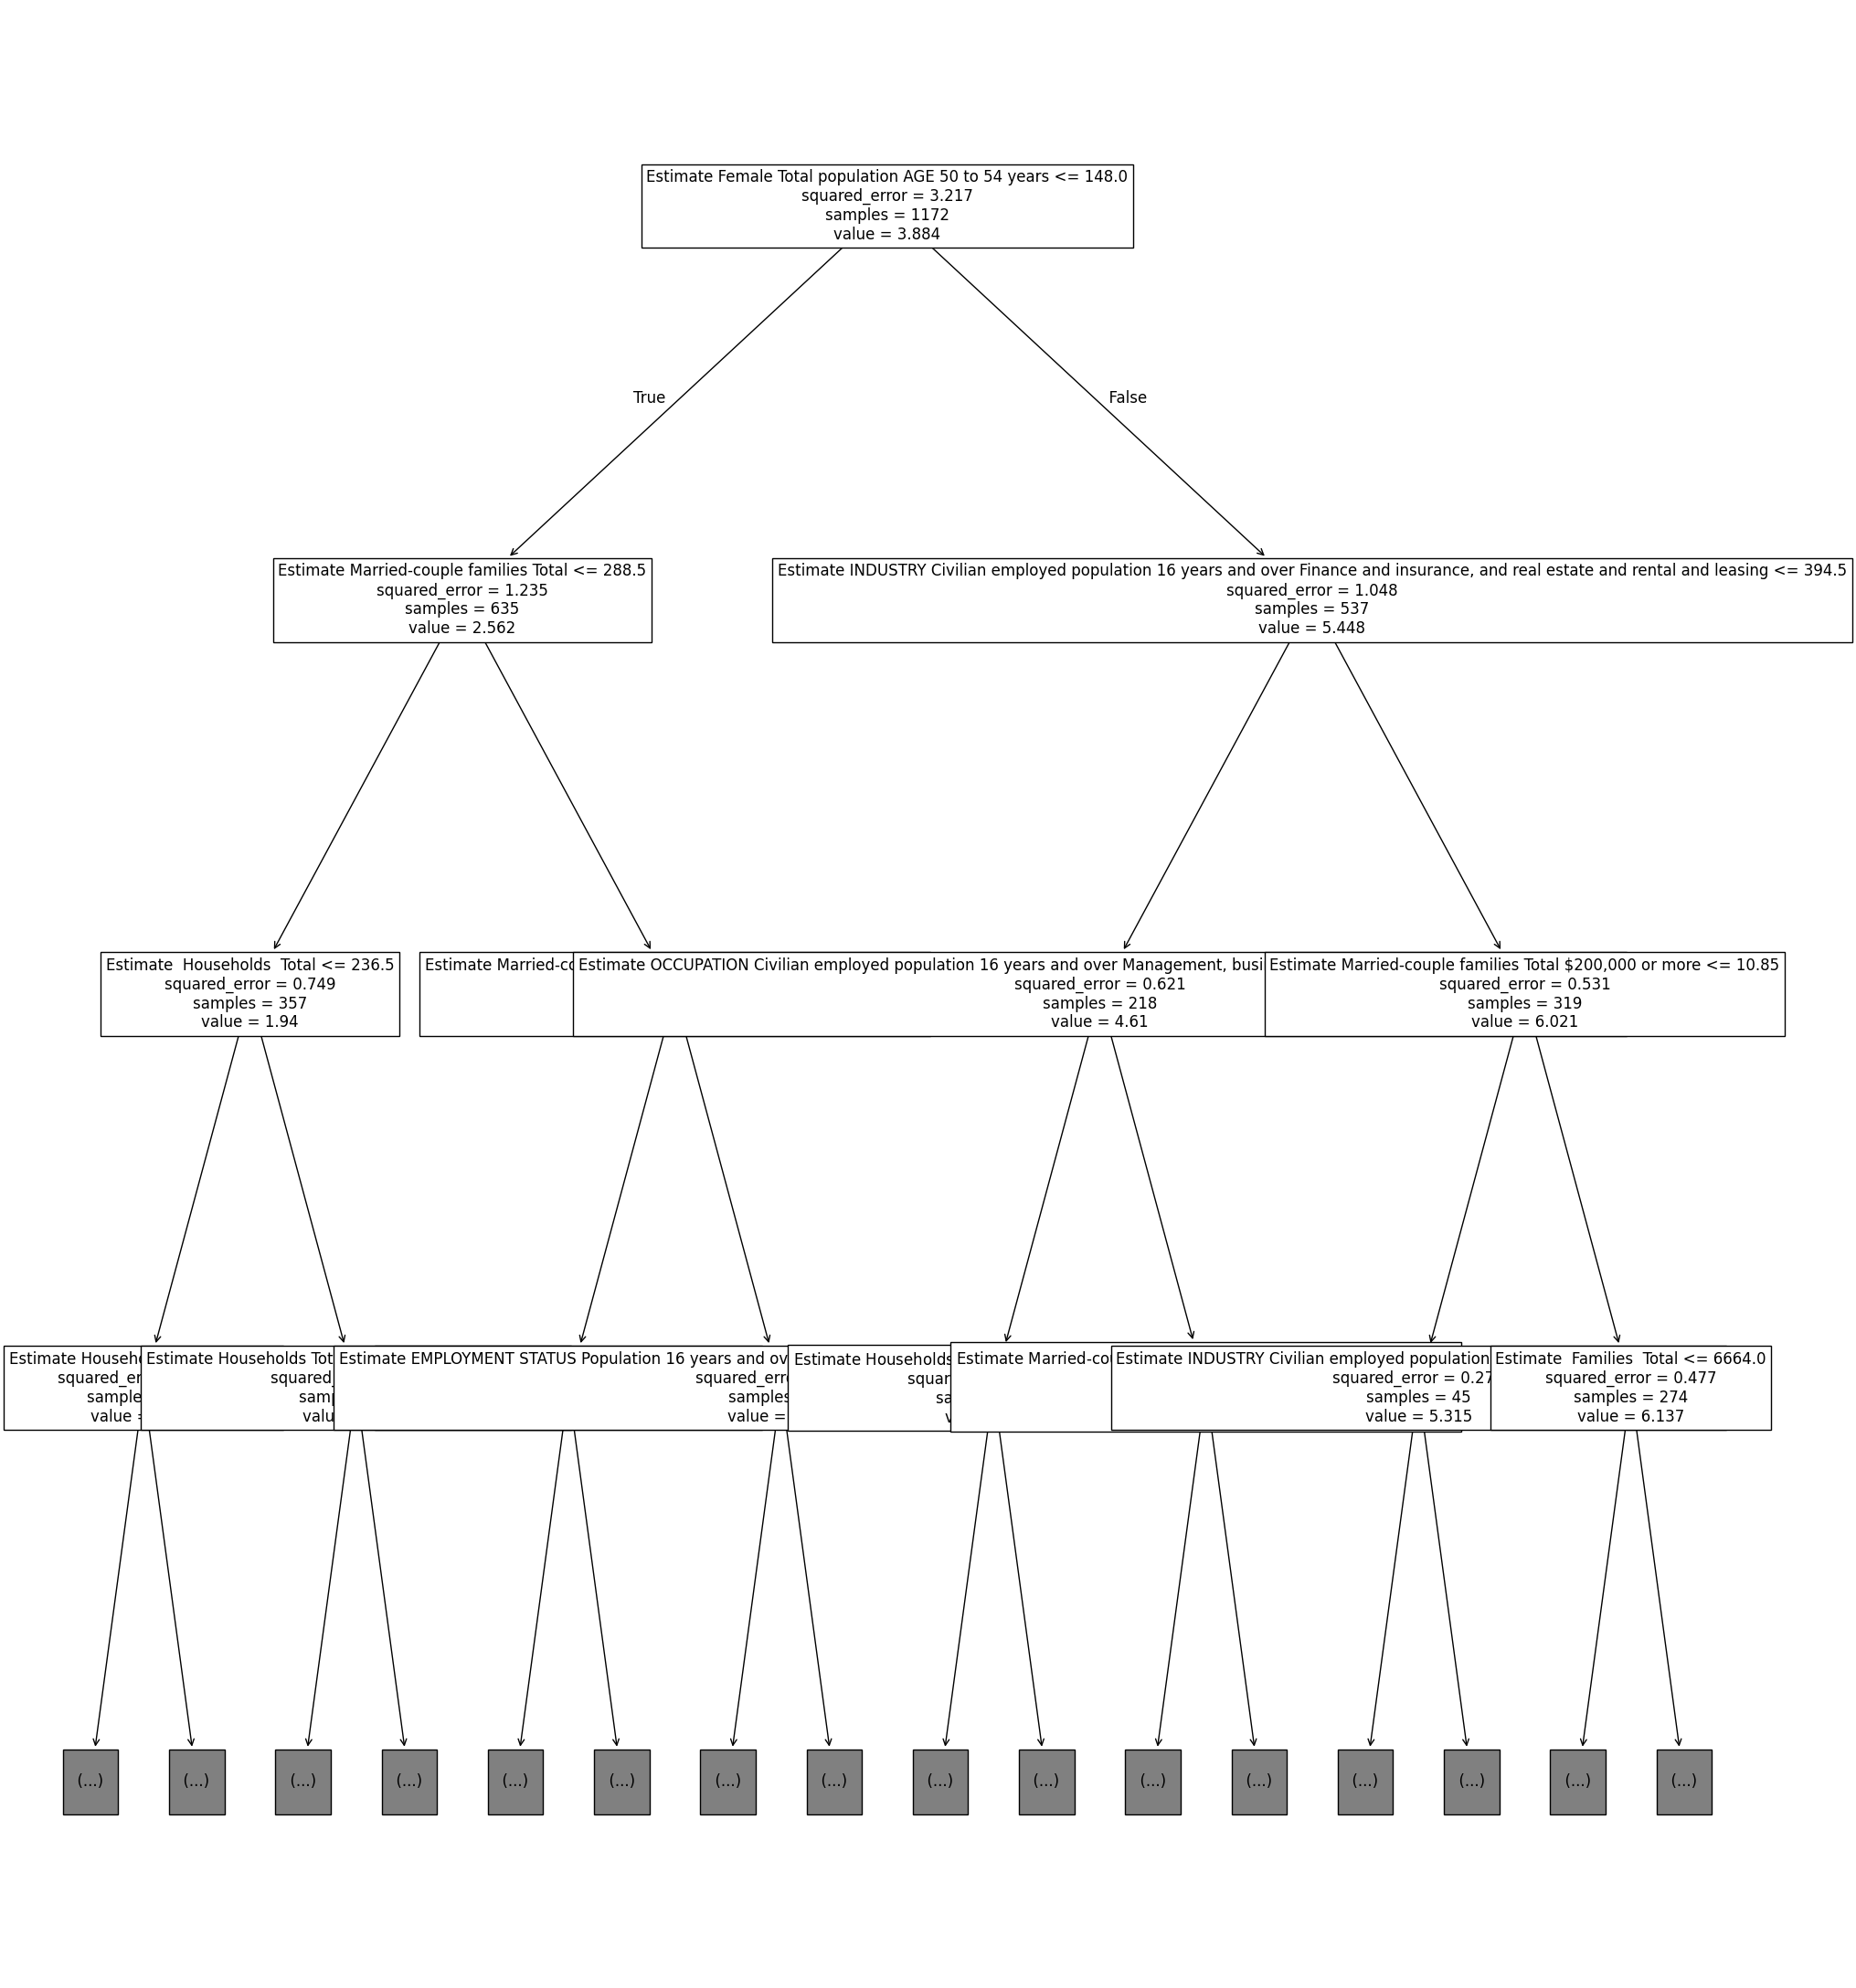

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

#associate column names with features
feature_names = X_train.columns

#set up a figure (mainly for the size)
fig, ax = plt.subplots(figsize=(24, 28))

#plot the tree
tree.plot_tree(dt_model,feature_names=feature_names, max_depth=3, fontsize=12)

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Run Cross-Validation for r_squared
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f"R_squared scores: {cv_scores}")
print(f"Average R_squared: {cv_scores.mean():.4f}")


R_squared scores: [0.87934693 0.83776558 0.85487381 0.88289835 0.88080834]
Average R_squared: 0.8671


In [ ]:
dt_model.fit(X_train, y_train)

test_rsquare = dt_model.score(X_test, y_test)
test_pred = dt_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

print(test_rsquare)
print(test_rmse)

0.8659774283272638
0.6288920159231104


In [ ]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 8, 10],
}

# Grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'max_depth': 5}
Best Score: 0.8671386007646745
